In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
train_df = pd.read_csv('data/train-problem2.csv')
test_df = pd.read_csv('data/public-problem2.csv')

In [157]:
train_df.head()

,Review,a0,a1,a2,a3,a4,a5
0,"Bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...",0,0,0,5,0,0
1,Đi Quy Nhơn cứ lo không có pizza ăn nhưng nhờ ...,0,0,0,5,0,0
2,"các món ăn ở đây không có gì đặc sắc, có lẽ nấ...",0,0,1,1,0,0
3,"Lần thứ 2 quay lại đây, vì giới thiệu quán cà ...",0,0,0,2,0,0
4,Rất khuyên bạn nên ghé thăm quán bar thể thao này,3,0,0,0,0,0


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2965 non-null   object
 1   a0      2965 non-null   int64 
 2   a1      2965 non-null   int64 
 3   a2      2965 non-null   int64 
 4   a3      2965 non-null   int64 
 5   a4      2965 non-null   int64 
 6   a5      2965 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 162.3+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  989 non-null    object
 1   a0      989 non-null    int64 
 2   a1      989 non-null    int64 
 3   a2      989 non-null    int64 
 4   a3      989 non-null    int64 
 5   a4      989 non-null    int64 
 6   a5      989 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 54.2+ KB


In [6]:
train_df.describe()

,a0,a1,a2,a3,a4,a5
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,0.630017,0.837437,0.296796,1.607757,0.755818,0.351096
std,1.536458,1.702745,1.110437,2.132173,1.624419,1.168281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
test_df.describe()

,a0,a1,a2,a3,a4,a5
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,0.686552,0.751264,0.318504,1.651163,0.702730,0.318504
std,1.601123,1.649687,1.118790,2.135741,1.574918,1.100548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>],
       [<AxesSubplot:title={'center':'a4'}>,
        <AxesSubplot:title={'center':'a5'}>]], dtype=object)

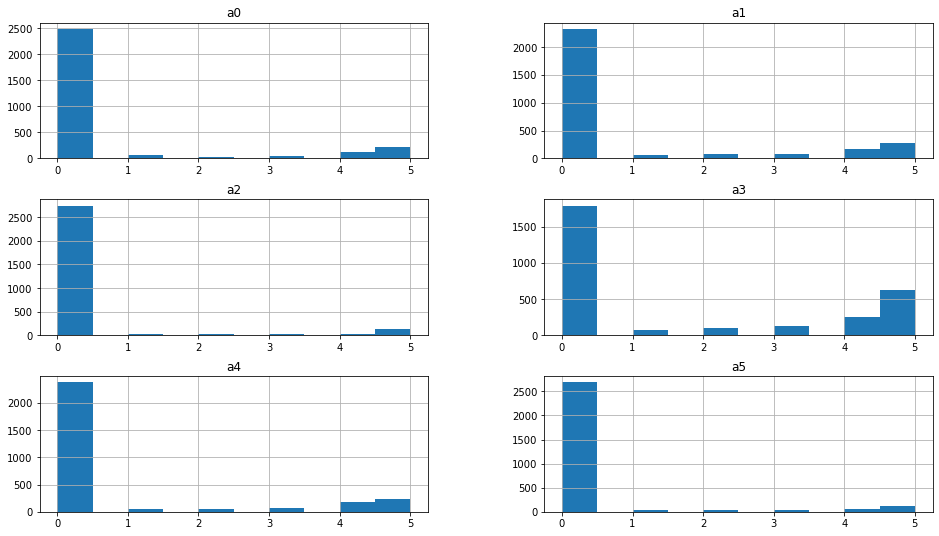

In [76]:
train_df.hist()

array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>],
       [<AxesSubplot:title={'center':'a4'}>,
        <AxesSubplot:title={'center':'a5'}>]], dtype=object)

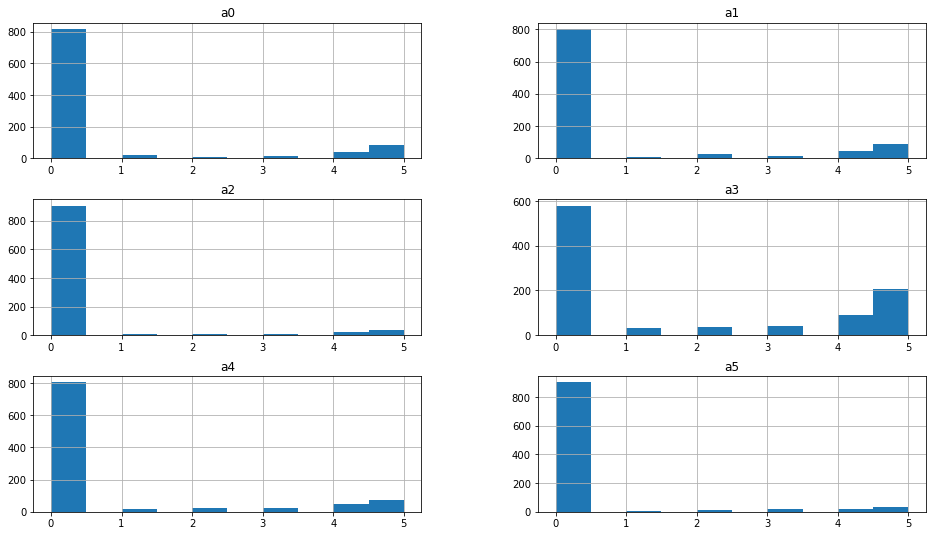

In [85]:
test_df.hist()

In [86]:
a_col = train_df.select_dtypes('int64').columns.to_list()

array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>],
       [<AxesSubplot:title={'center':'a4'}>,
        <AxesSubplot:title={'center':'a5'}>]], dtype=object)

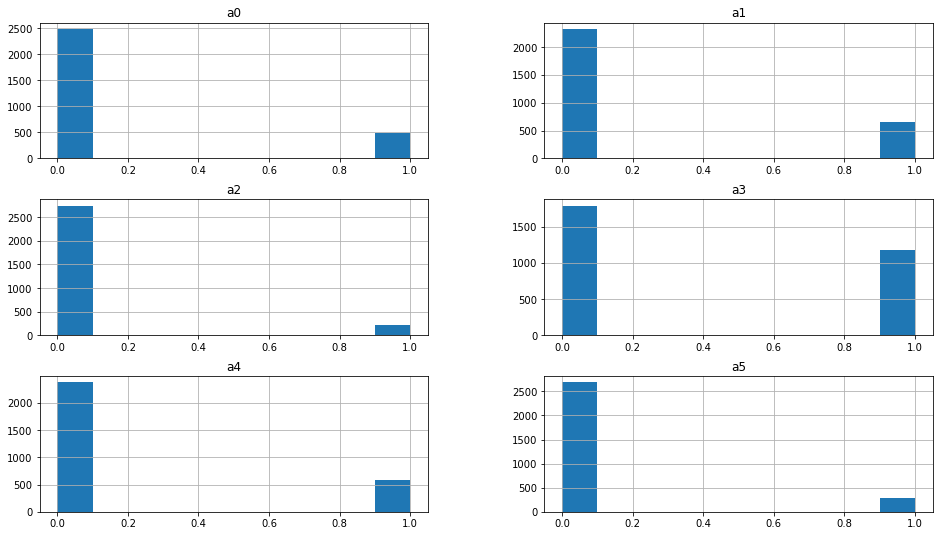

In [93]:
train_df[a_col].clip(upper=1).hist()

array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>],
       [<AxesSubplot:title={'center':'a4'}>,
        <AxesSubplot:title={'center':'a5'}>]], dtype=object)

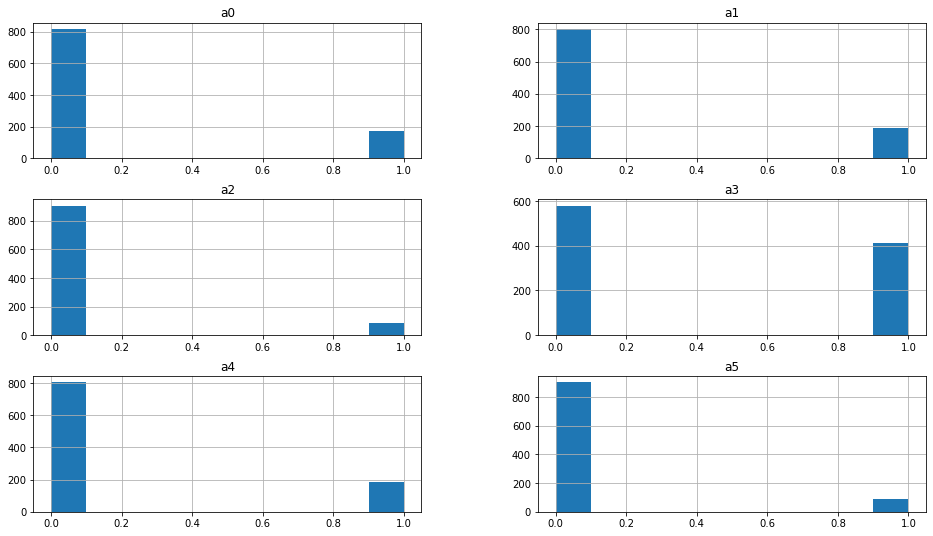

In [94]:
test_df[a_col].clip(upper=1).hist()

<AxesSubplot:ylabel='Frequency'>

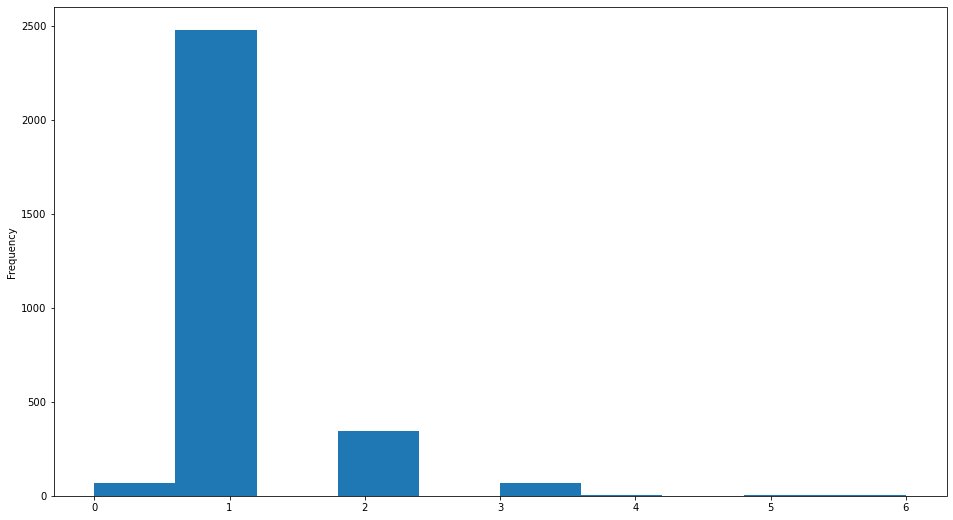

In [97]:
train_df[a_col].clip(upper=1).sum(axis=1).plot.hist()

<AxesSubplot:ylabel='Frequency'>

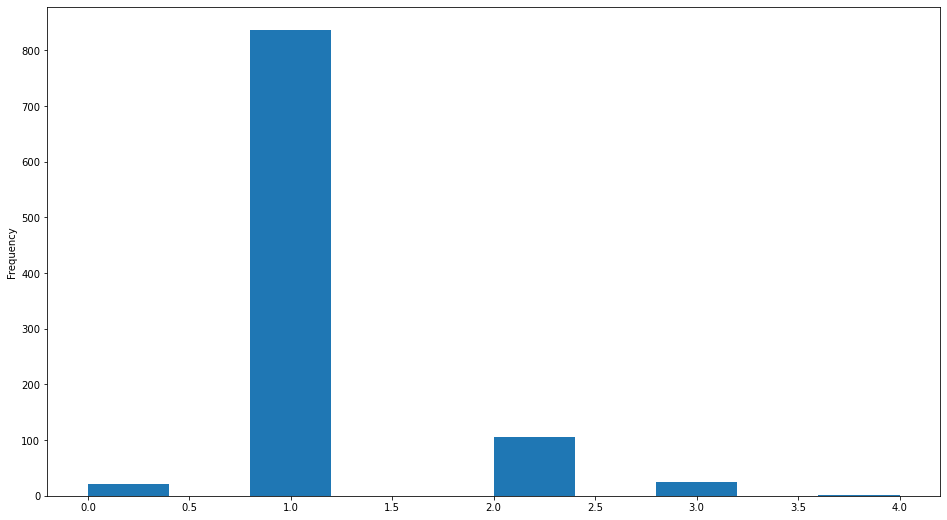

In [98]:
test_df[a_col].clip(upper=1).sum(axis=1).plot.hist()

In [100]:
train_df[a_col].clip(upper=1).sum().sum()/train_df[a_col].clip(upper=1).count().sum() * 100

19.106239460370993

In [99]:
test_df[a_col].clip(upper=1).sum().sum()/test_df[a_col].clip(upper=1).count().sum() * 100

18.975396022918773

In [3]:
import imp
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [4]:
x_train = train_df['Review']
y_train_a0 = train_df['a0'].clip(upper=1)
y_train_a1 = train_df['a1'].clip(upper=1)
y_train_a2 = train_df['a2'].clip(upper=1)
y_train_a3 = train_df['a3'].clip(upper=1)
y_train_a4 = train_df['a4'].clip(upper=1)
y_train_a5 = train_df['a4'].clip(upper=1)

In [5]:
x_test = test_df['Review']
y_test_a0 = test_df['a0'].clip(upper=1)
y_test_a1 = test_df['a1'].clip(upper=1)
y_test_a2 = test_df['a2'].clip(upper=1)
y_test_a3 = test_df['a3'].clip(upper=1)
y_test_a4 = test_df['a4'].clip(upper=1)
y_test_a5 = test_df['a4'].clip(upper=1)

In [6]:
x_train.head()

0    Bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...
1    Đi Quy Nhơn cứ lo không có pizza ăn nhưng nhờ ...
2    các món ăn ở đây không có gì đặc sắc, có lẽ nấ...
3    Lần thứ 2 quay lại đây, vì giới thiệu quán cà ...
4    Rất khuyên bạn nên ghé thăm quán bar thể thao này
Name: Review, dtype: object

In [15]:
import re
import string
def text_cleaner(review):
    review = review.replace('\n', ' ')
    review = review.replace('-', ' ')
    review = review.replace('.', '')
    review = re.sub("\s\s+" , " ", review)
    # review = re.sub(r'[^\w\s]', '', review)
    review = review.strip()
    review = review.lower()
    return review

In [16]:
x_train_cp = x_train.map(text_cleaner)
x_test_cp = x_test.map(text_cleaner)

In [17]:
x_train_cp

0       bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...
1       đi quy nhơn cứ lo không có pizza ăn nhưng nhờ ...
2       các món ăn ở đây không có gì đặc sắc, có lẽ nấ...
3       lần thứ 2 quay lại đây, vì giới thiệu quán cà ...
4       rất khuyên bạn nên ghé thăm quán bar thể thao này
                              ...                        
2960       hải sản chủ yếu buổi chiều giá cao hơn chợ đầm
2961    ngoài ra, khách sạn ở khu trung tâm, gần bãi b...
2962         khách sạn sạch sẽ tiện nghi, dịch vụ đa dạng
2963    sẽ ủng hộ lâu dài, tuy nhiên còn vài điều cần ...
2964    vị trí siêu thuận tiện, tại trung tâm thành ph...
Name: Review, Length: 2965, dtype: object

In [18]:
x_test_cp

0      nơi đó thật kinh khủng, chúng tôi nhìn thấy nh...
1             quán sạch sẽ, món ăn tươi ngon, giá lại rẻ
2      phục vụ mãi mãi, thức ăn không ngon, và họ thậ...
3      nhiều món đăc trưng : vú nàng nướng mỡ hành, b...
4      không phải là một cách tồi để đi giữa sài gòn ...
                             ...                        
984    vị trí trung tâm ẩm thực phong phú , phòng có ...
985    người lái xe đến sớm để đợi tôi tôi yên tâm rằ...
986    phòng đẹp, sạch sẽ đầy đủ tiện nghi, nằm trong...
987    nói chung là rất nhàm chán cới kiểu làm du lịc...
988    lần đầu trải nghiệm sbay phù cát, các bạn nhân...
Name: Review, Length: 989, dtype: object

In [25]:
vectorizer = TfidfVectorizer(min_df=.0025, max_df=0.25, ngram_range=(1,3))
X = vectorizer.fit_transform(x_train_cp)
y = vectorizer.transform(x_test_cp)

In [41]:
vectorizer.get_feature_names_out().shape

(5470,)

In [26]:
train_texts=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
test_texts=pd.DataFrame(y.toarray(),columns=vectorizer.get_feature_names_out())

In [28]:
train_texts.shape

(2965, 4782)

In [31]:
test_texts.shape

(989, 4782)

In [177]:
print(test_texts.shape)

(989, 10000)


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
train_texts = pca.fit_transform(train_texts)
test_texts = pca.transform(test_texts)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_texts = scaler.fit_transform(train_texts)
test_texts = scaler.transform(test_texts)

In [37]:
import torch
from transformers import AutoModel, AutoTokenizer
import py_vncorenlp
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='E:\\OneDrive\\Hackathon\\Problem2\\vncorenlp')

c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special 

In [8]:
x_train_cp_segment = x_train_cp.map(rdrsegmenter.word_segment).apply(lambda x: x[0])
x_test_cp_segment = x_test_cp.map(rdrsegmenter.word_segment).apply(lambda x: x[0])

In [18]:
x_train_cp_segment_token = x_train_cp_segment.apply(lambda x: tokenizer.encode(x))
x_test_cp_segment_token = x_test_cp_segment.apply(lambda x: tokenizer.encode(x))

In [33]:
x_len = x_train_cp_segment_token.apply(lambda x: len(x))
y_len = x_test_cp_segment_token.apply(lambda x: len(x))

In [34]:
x_len.mean()

49.59831365935919

In [35]:
y_len.mean()

48.43073811931244

<AxesSubplot:>

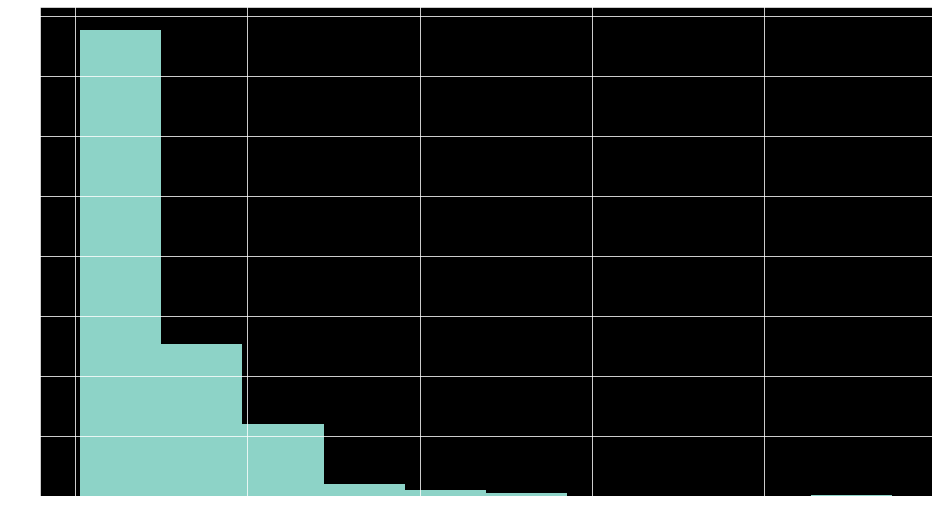

In [28]:
x_len.hist()

<AxesSubplot:>

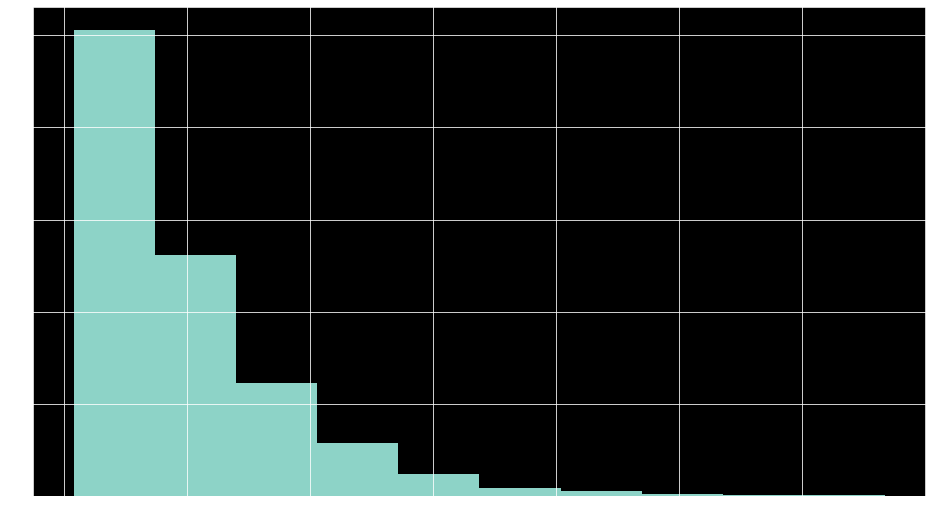

In [36]:
y_len.hist()

In [40]:
(x_len > 256).sum()/x_len.count()

0.004384485666104553

In [41]:
x_train_cp_segment_token = x_train_cp_segment_token.apply(lambda x: x[:256])
x_test_cp_segment_token = x_test_cp_segment_token.apply(lambda x: x[:256])

In [45]:
with torch.no_grad():
    x_train_cp_feature = x_train_cp_segment_token.apply(lambda x : phobert(torch.tensor([x])).pooler_output[0].numpy())
    x_test_cp_feature = x_test_cp_segment_token.apply(lambda x : phobert(torch.tensor([x])).pooler_output[0].numpy())

In [51]:
x_train_cp_feature[0].shape

(768,)

In [ ]:
x_train_cp_feature.head()

In [32]:
xgboost = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
xgboost.fit(train_texts, y_train_a0)
train_results=xgboost.predict(train_texts)
test_results=xgboost.predict(test_texts)
f1_train=f1_score(y_train_a0, train_results)
print(f'F1 score on train set {f1_train}')
f1_test=f1_score(y_test_a0, test_results)
print(f'F1 score on test set {f1_test}')

F1 score on train set 0.7955390334572491
F1 score on test set 0.5


In [36]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
print(classification_report(test_results, y_test_a0))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       902
           1       0.38      0.75      0.50        87

    accuracy                           0.87       989
   macro avg       0.67      0.81      0.71       989
weighted avg       0.92      0.87      0.89       989



In [60]:
model=RandomForestClassifier(n_estimators=100)
model.fit(list(x_train_cp_feature), y_train_a1)

RandomForestClassifier()

In [152]:
model_2 = SVC(C=5.0)
model_2.fit(train_texts, y_train_a0)

SVC(C=5.0)

In [14]:
model_3 = MultinomialNB()
model_3.fit(train_texts, y_train_a0)

MultinomialNB()

In [61]:
train_results = model.predict(list(x_train_cp_feature))
test_results = model.predict(list(x_test_cp_feature))

In [153]:
train_results=model_2.predict(train_texts)
test_results=model_2.predict(test_texts)

In [15]:
train_results=model_3.predict(train_texts)
test_results=model_3.predict(test_texts)

In [62]:
f1_train=f1_score(y_train_a1, train_results)
print(f'F1 score on train set {f1_train}')
f1_test=f1_score(y_test_a1, test_results)
print(f'F1 score on test set {f1_test}')

F1 score on train set 0.987519500780031
F1 score on test set 0.6323024054982818


In [6]:
import py_vncorenlp
import pandas as pd
from utils import *

rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='E:\\OneDrive\\Hackathon\\Problem2\\vncorenlp')

train_df = pd.read_csv('data\\train-problem2.csv')
test_df = pd.read_csv('data\\train-problem2.csv')

ValueError: VM is already running, can't set classpath/options; VM started at  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
    await self.process_one()
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
    await dispatch(*args)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
    await result
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
    reply_content = await reply_content
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
    return super().run_cell(*args, **kwargs)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
    return runner(coro)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
    coro.send(None)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11276\2769565719.py", line 5, in <module>
    rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='E:\\OneDrive\\Hackathon\\Problem2\\vncorenlp')
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\py_vncorenlp\vncorenlp.py", line 53, in __init__
    from jnius import autoclass
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\jnius\__init__.py", line 45, in <module>
    from .reflect import *  # noqa
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\jnius\reflect.py", line 20, in <module>
    class Class(with_metaclass(MetaJavaClass, JavaClass)):
  File "c:\Users\ADMIN\anaconda3\envs\QN3.7\lib\site-packages\six.py", line 872, in __new__
    return meta(name, resolved_bases, d)


In [3]:
train_df

NameError: name 'train_df' is not defined